In [12]:
car_img_path = '/content/car.jpeg'

In [13]:
car_img_path

'/content/car.jpeg'

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [15]:
img = cv2.imread(car_img_path)

In [16]:
# RGB -> BGR when read by matplotlib

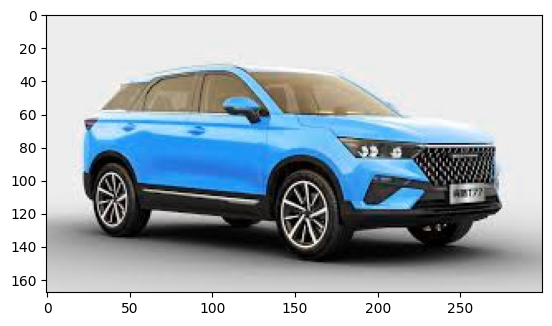

In [17]:
plt.imshow(img)

In [18]:
img2 = cv2.cvtColor(img,cv2. COLOR_BGR2RGB)

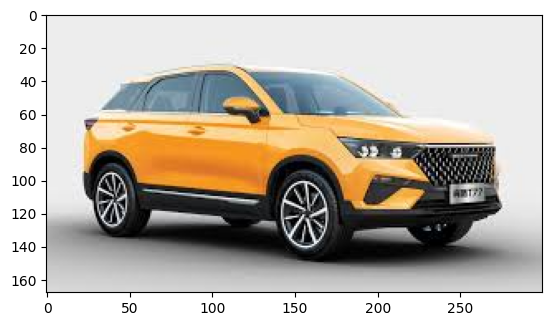

In [19]:
plt.imshow(img2)

In [20]:
img3 = cv2.cvtColor(img,cv2. COLOR_BGR2GRAY)

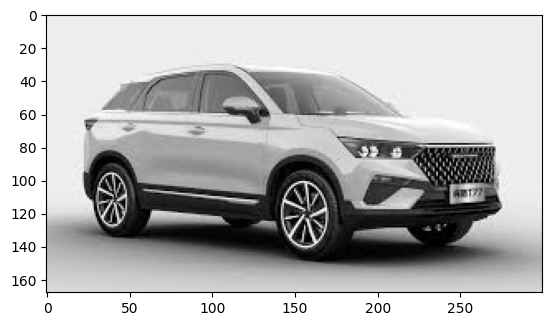

In [21]:
plt.imshow(img3,cmap ="gray")

In [22]:
img.shape

(168, 300, 3)

In [23]:
img2.shape

(168, 300, 3)

In [24]:
img3.shape

(168, 300)

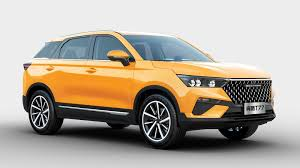

In [25]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [26]:
row,col = img3.shape

In [27]:
car = img3.reshape(1,row, col, 1)

In [28]:
car.shape

(1, 168, 300, 1)

In [29]:
 Conv_layer= [tf.keras.layers.Conv2D(
    filters = 1,
    kernel_size = (3,3),
    strides = (1,1),
    input_shape = car.shape[1:]
)]

In [30]:
conv_model = tf.keras.Sequential(Conv_layer)


In [31]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
output =conv_model.predict(car)

1/1 [==============================] - 8s 8s/step


In [33]:
output.shape

(1, 166, 298, 1)

In [34]:
row, col = output.shape[1:-1]

In [35]:
reshape_output = output.reshape(row, col)

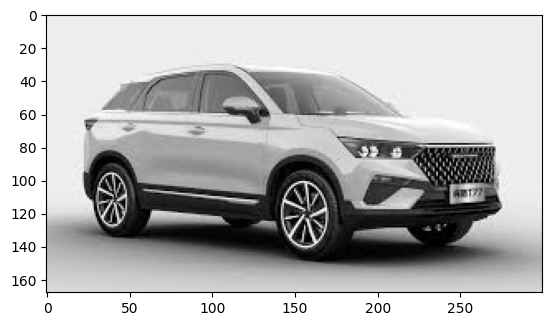

In [44]:
plt.imshow(img3, cmap = 'gray')

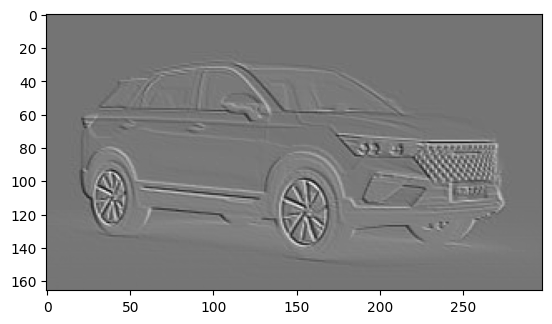

In [36]:
plt.imshow(reshape_output, cmap = 'gray')

In [37]:
row,col,depth = img2.shape

In [38]:
color_car = img2

In [39]:
reshaped_color_img =color_car.reshape(1,row,col,depth)

In [50]:
reshaped_color_img.shape[1:]

(168, 300, 3)

In [53]:
Conv_layer = [tf.keras.layers.Conv2D(
    filters = 1,
    kernel_size = (3,3),
    strides = (1,1),
    input_shape = reshaped_color_img.shape[1:]
  )]

In [54]:
conv_model = tf.keras.Sequential(Conv_layer)

In [55]:
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# 3*3*3+1 = 28 params

In [59]:
color_output = conv_model.predict(reshaped_color_img)

1/1 [==============================] - 0s 32ms/step


In [60]:
color_output.shape

(1, 166, 298, 1)

In [61]:
# cannot represent in imshow() because it is in 4 dimension. We have to reshape color output

In [63]:
row,col = color_output.shape[1:-1]

In [65]:
reshaped_output = color_output.reshape(row,col)

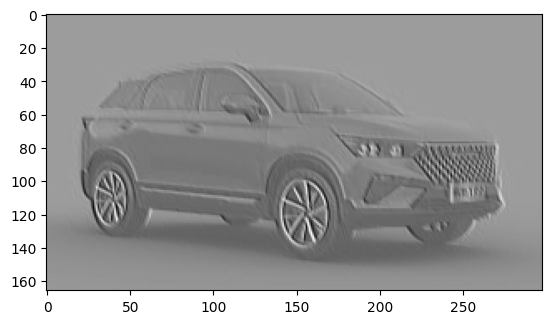

In [67]:
plt.imshow(reshaped_output,cmap = 'gray')

Max Pooling

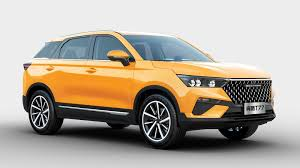

In [70]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

From the above img extract the maximum pixel using max pool

In [71]:
def reshaping_in(img,grayscale = True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth)# colored
  return color_img

In [72]:
def max_pooling(img,pool_size=(2,2),strides = (2,2)):
  reshaped_img = reshaping_in(img,grayscale = False)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size = pool_size,strides = strides)
  result = pooling_layer(reshaped_img)
  return result

In [69]:
color_car.shape

(168, 300, 3)

In [73]:
result = max_pooling(color_car)

In [74]:
result.shape

TensorShape([1, 84, 150, 3])

In [82]:
def plot(result):
  _,row,col,_= result.shape
  reshaped_img = tf.reshape(result,(row,col,3))
  plt.imshow(reshaped_img)



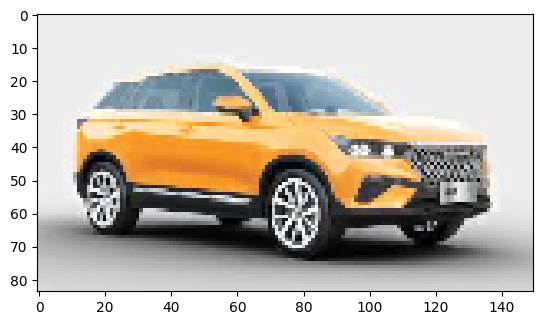

In [83]:
plot(result)

# Application

In [89]:
def reshaping_in(img,grayscale = True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth)# colored
  return color_img

In [90]:
def get_conv_model(filters = 1,filter_size=(3,3),strides = (1,1),input_shape=None,padding ="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters = filters,
                                       kernel_size = filter_size,
                                       strides =(1,1),
                                       input_shape = input_shape,
                                       padding = padding)]
  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [91]:
def apply_conv_model_and_visualize(img,conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row,col,depth = out.shape[1:]
    reshape_out = out.reshape(row,col,depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap = 'gray')
      plt.show()

  except Exception as e:
    raise e

In [93]:
color_car.shape

(168, 300, 3)

In [94]:
input_img = reshaping_in(color_car,grayscale = False)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 69ms/step
(1, 166, 298, 10)


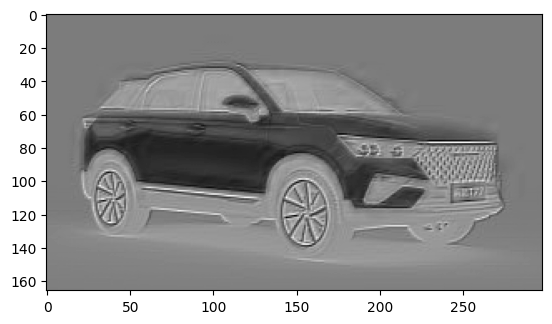

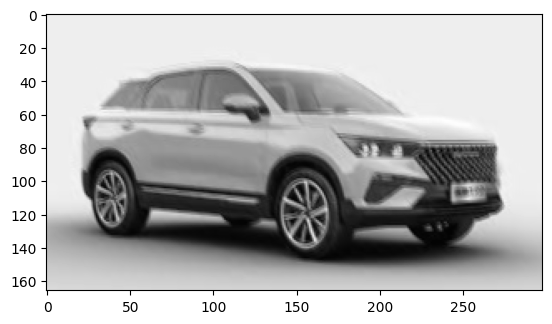

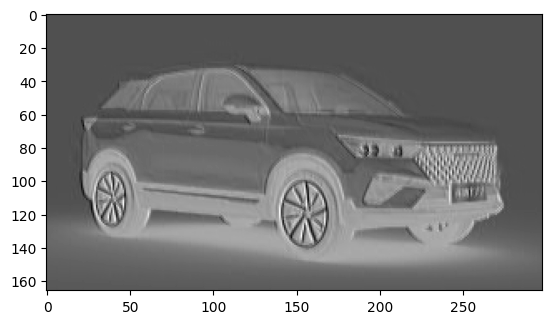

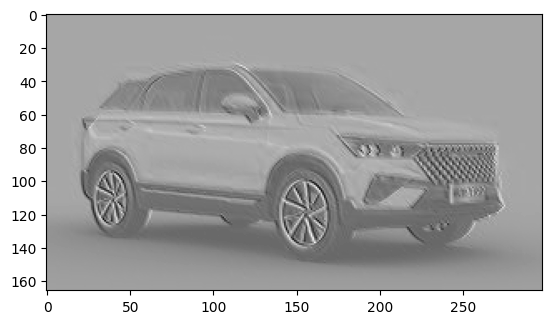

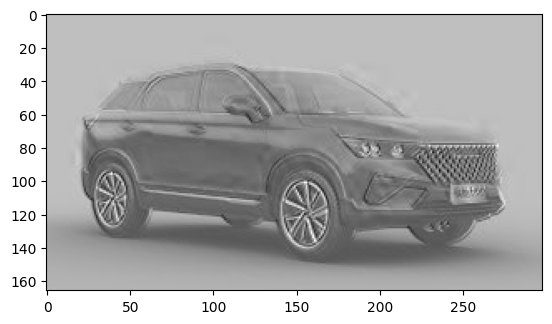

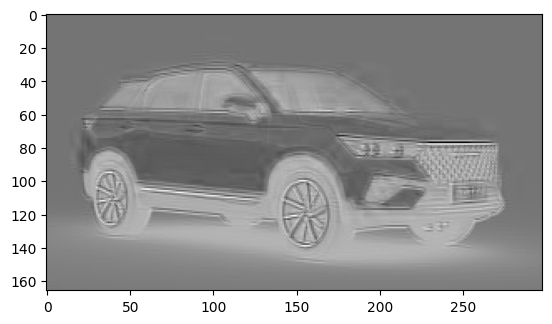

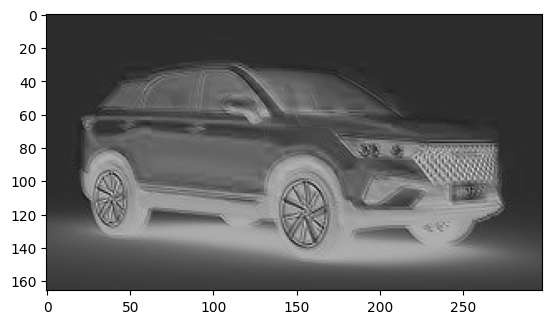

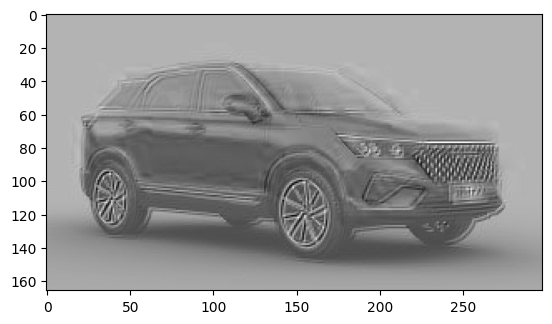

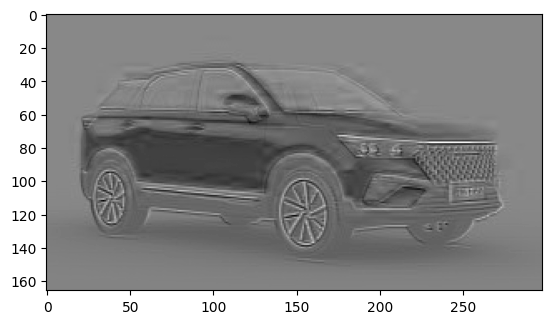

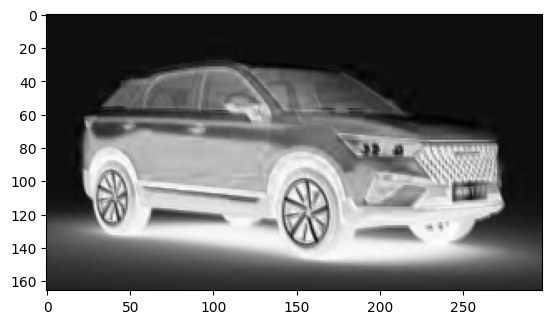

In [99]:
model = get_conv_model(filters = 10,filter_size = (3,3),strides = (1,1), input_shape = input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

Here, we have 10 filters. Our dimension becomes = (166,258,10)